In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/train.csv')
data = data.drop('id', axis=1) # id 제외하고 분석

test = pd.read_csv('/content/test.csv')
test = test.drop('id', axis=1) # id 제외하고 분석

pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함
data # 데이터 확인

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [3]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

결측치 확인결과 결측치가 존재하지 않음

**기초 통계 분석 >> 변수 관찰**

In [4]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


# 데이터 시각화


feature 분포 시각화


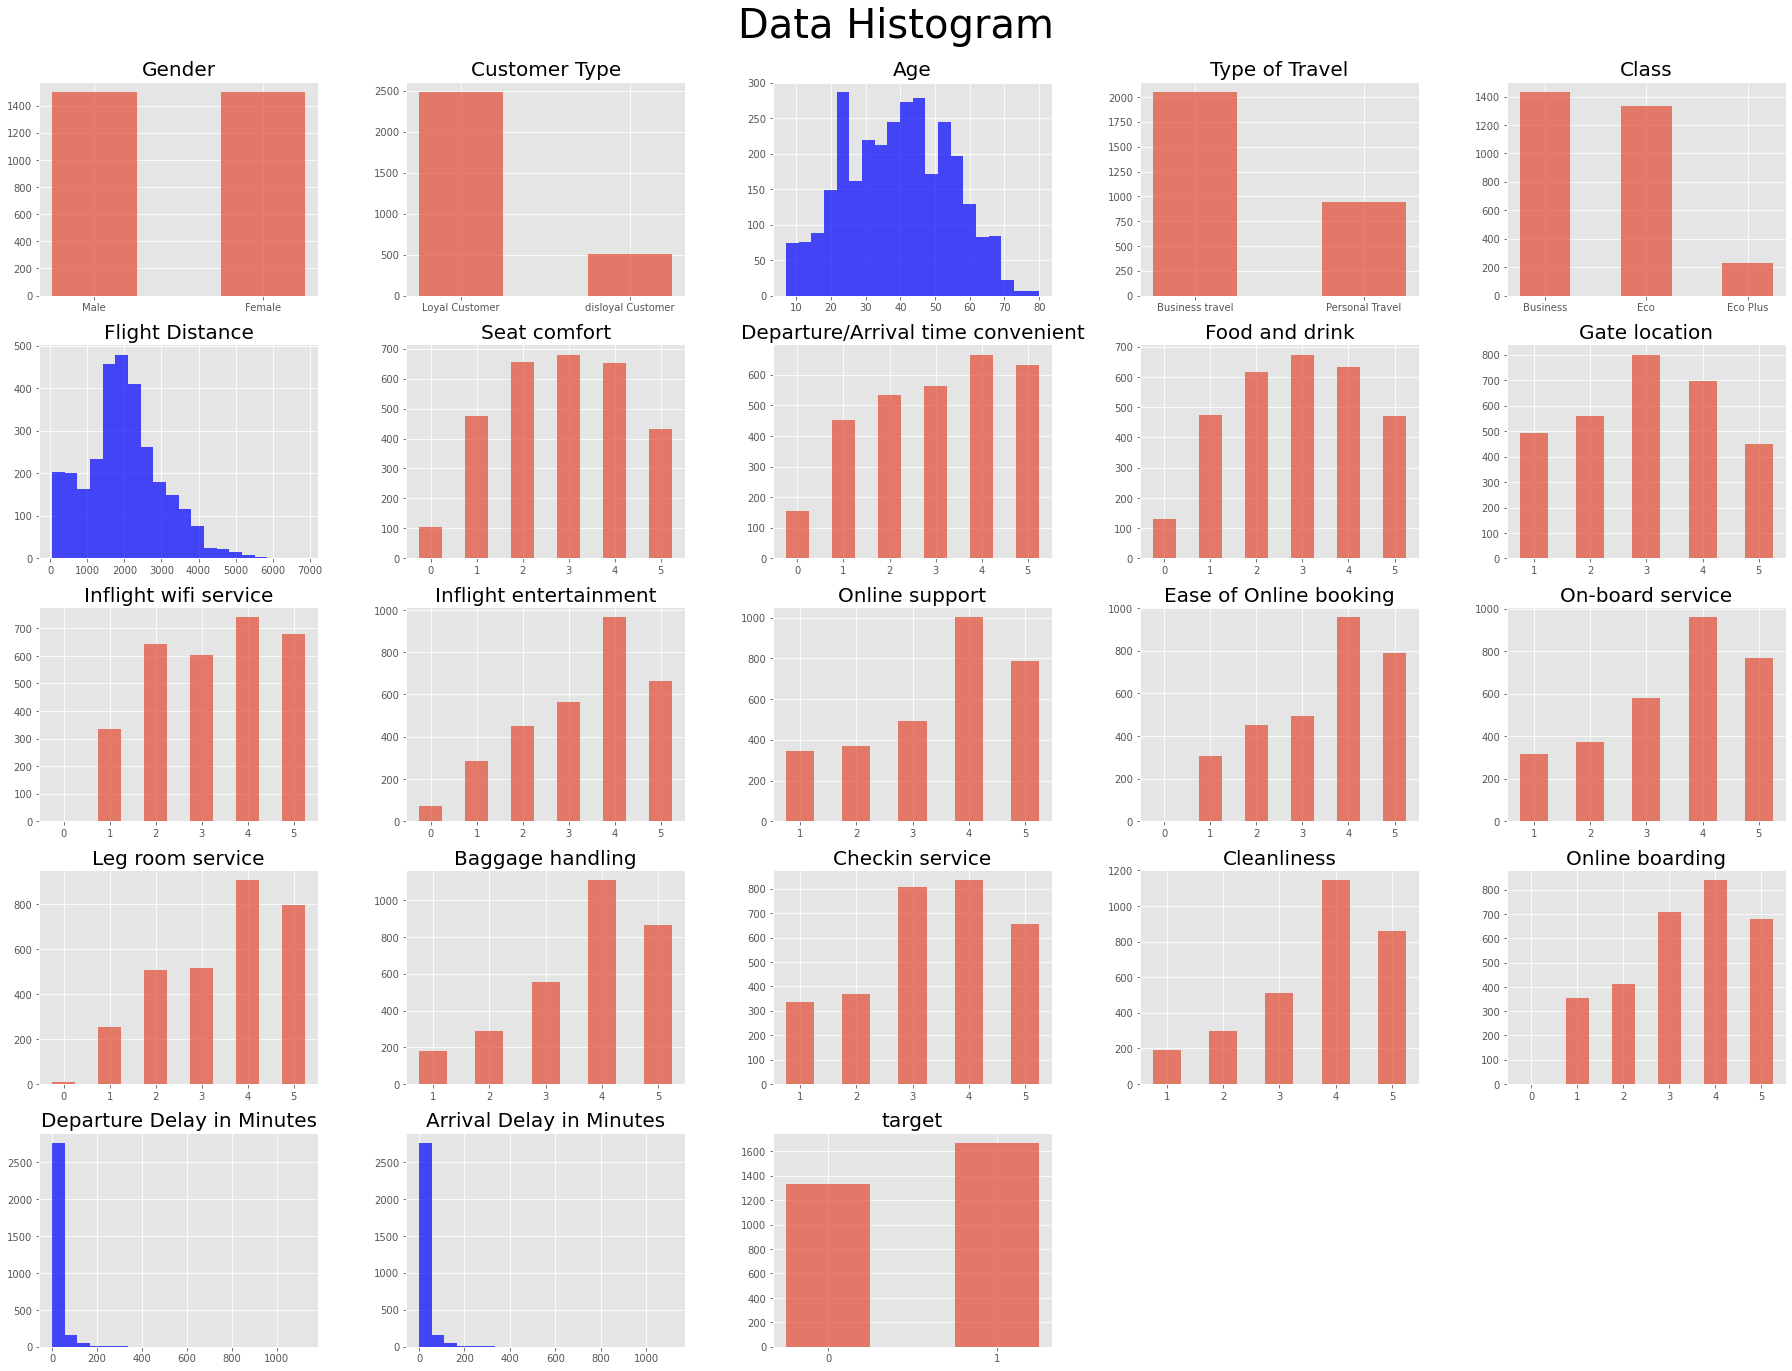

In [5]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("Data Histogram", fontsize = 40)

# id는 제외하고 시각화
cols = data.columns
for i in range(len(cols)):
    plt.subplot(5, 5, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 수 있습니다.
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(data[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = data[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

target과 feature들의 관계 확인

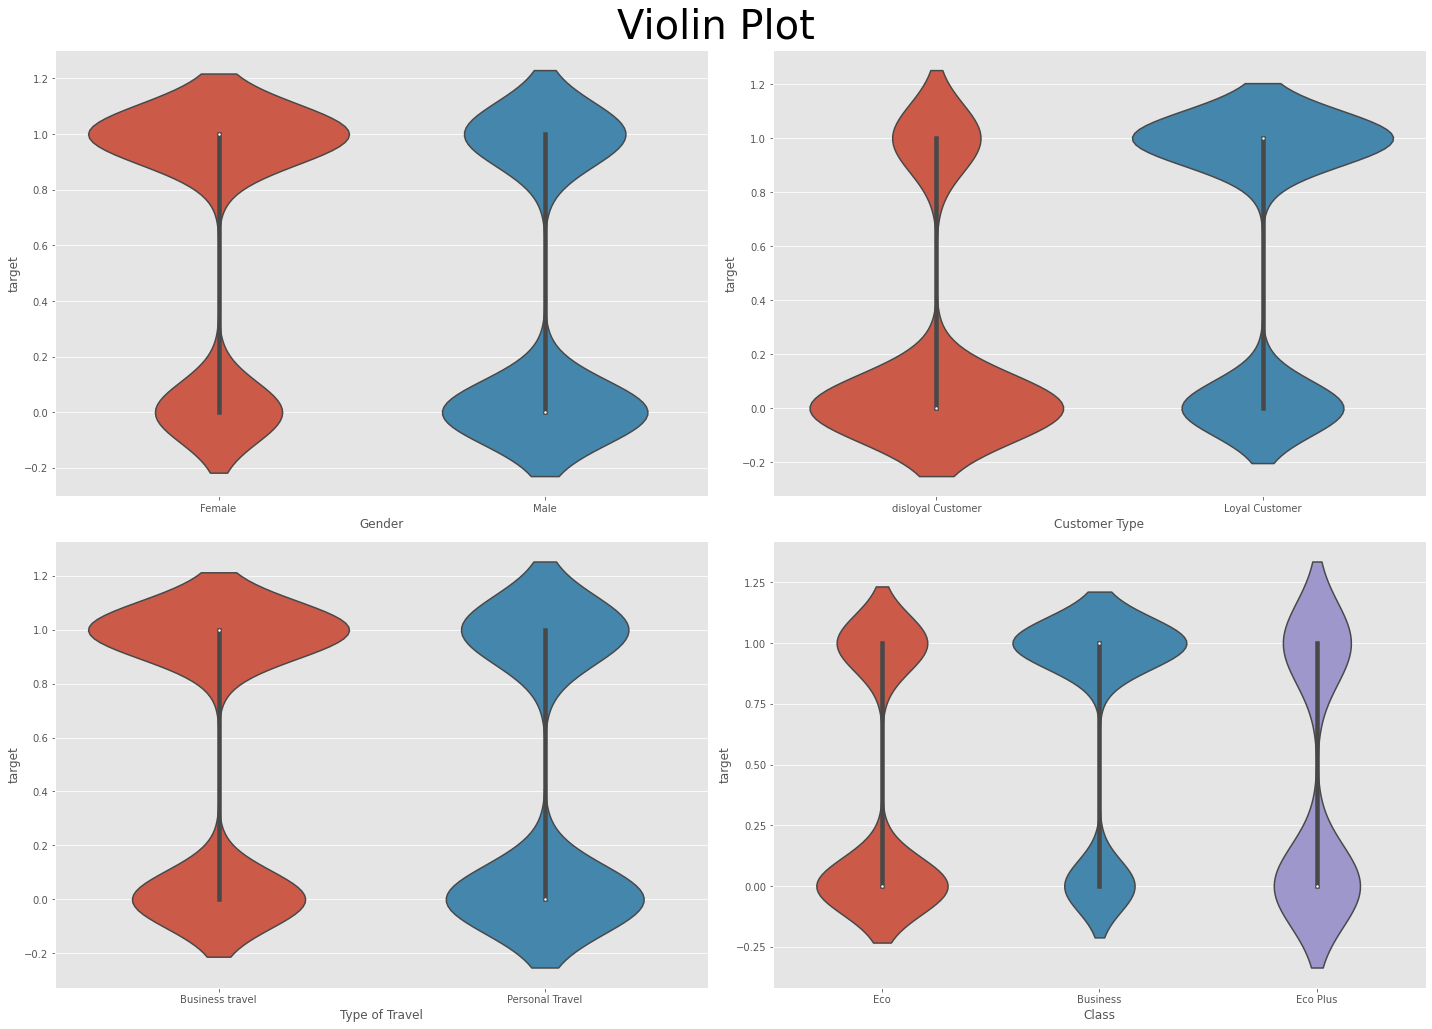

In [6]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[categorical_feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

target은 0과 1로 이루어져 있음.
 gender - 여성은 1이 많고 남성은 0이 많음.
 Customer Type 같은 경우 disloyal과 loyal에 따라 target값이 굉장히 차이가 남.

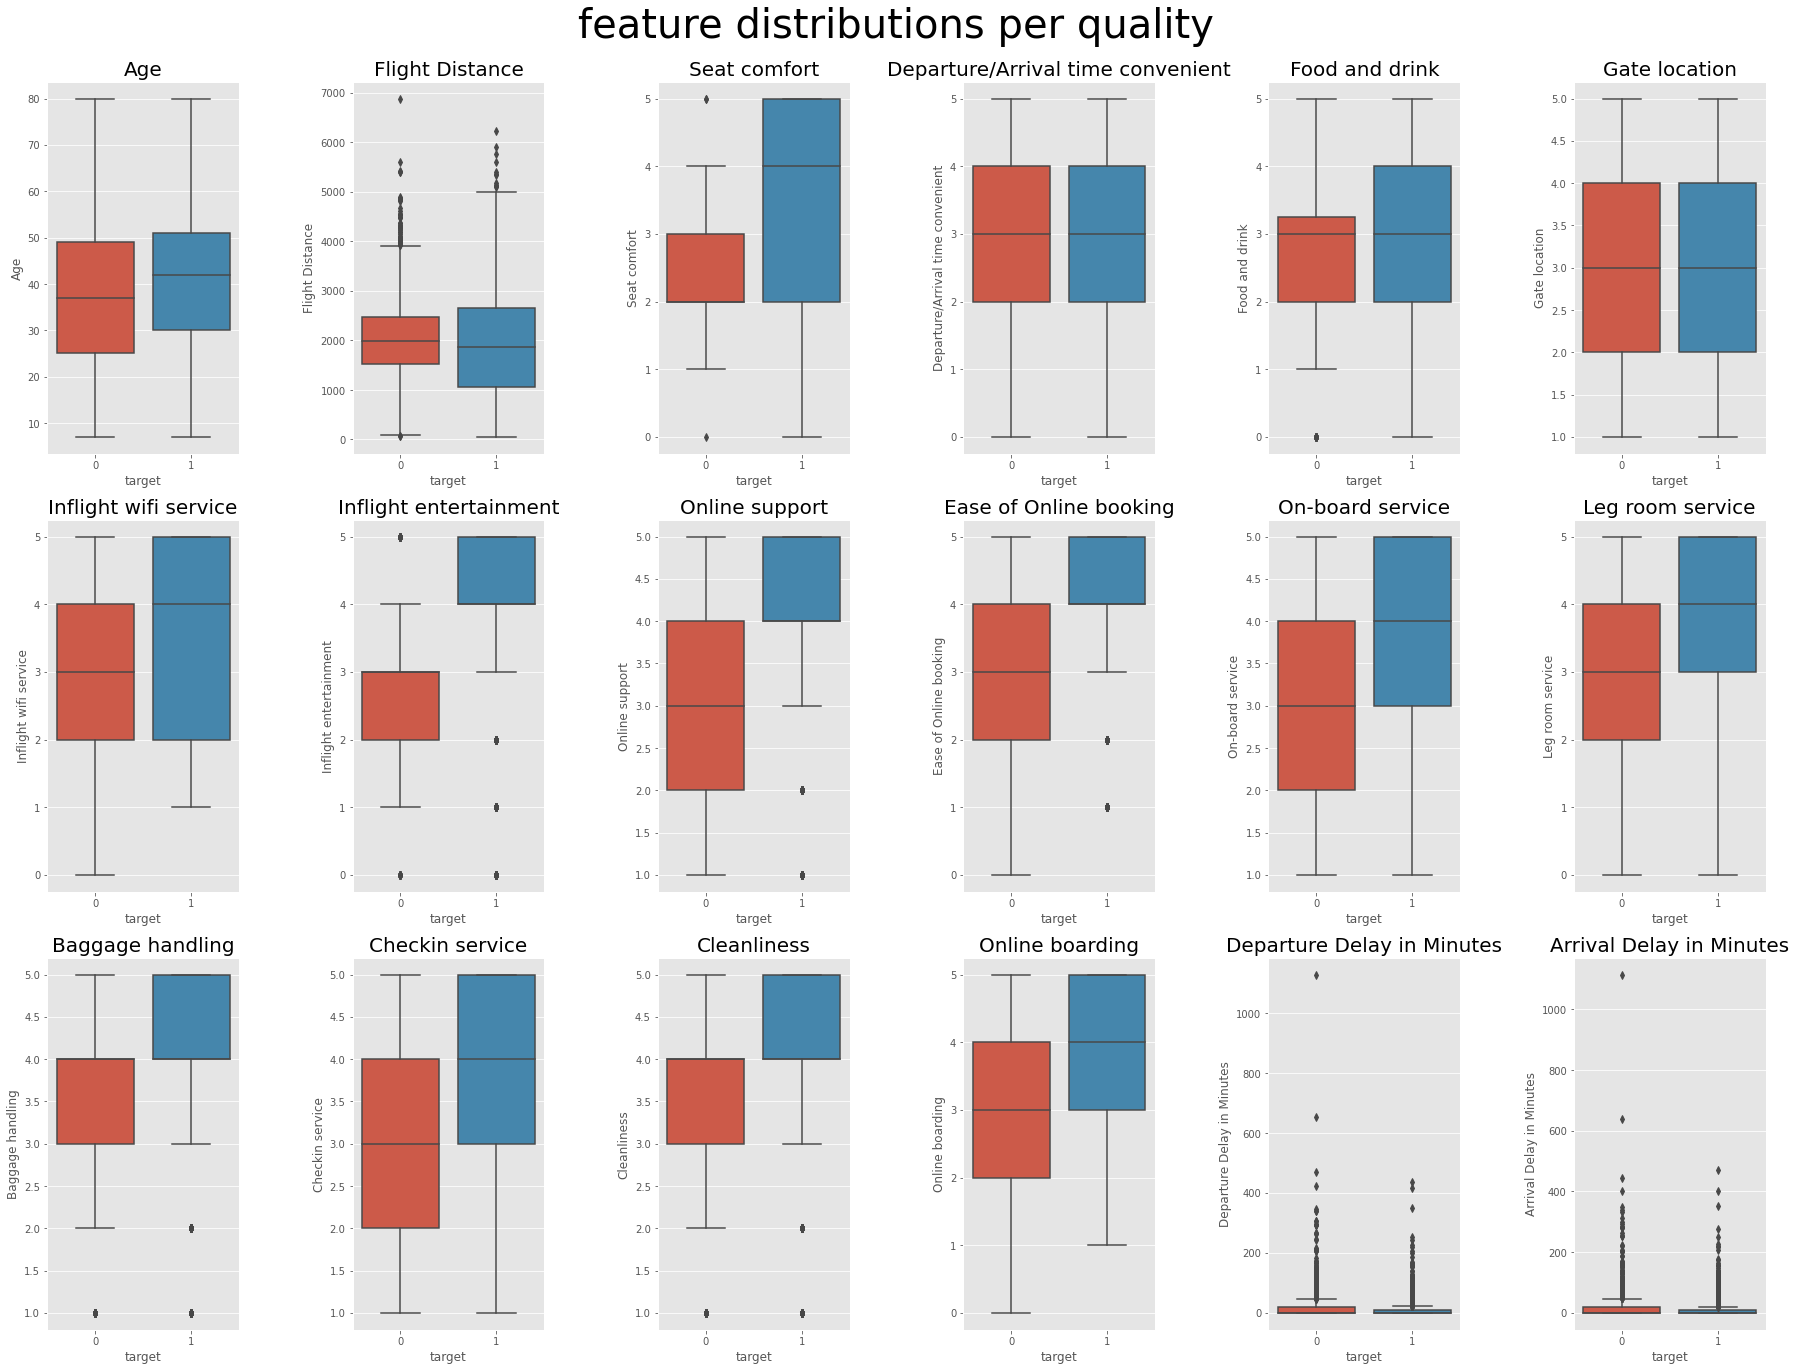

In [7]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

박스들이 중간에 있을 수록, 이상치가 없을 수록 골고루 분포됨.
즉, target이 0이던 1이던 골고루 있다는 것은 중요한 특징이 아님. 
age, Departure/Arrival time convenient, Gate location 등은 별 연관이 없는 것을 알 수 있음.

# feature들 간의 상관관계 살피기

In [8]:
# 텍스트 데이터 수치화
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

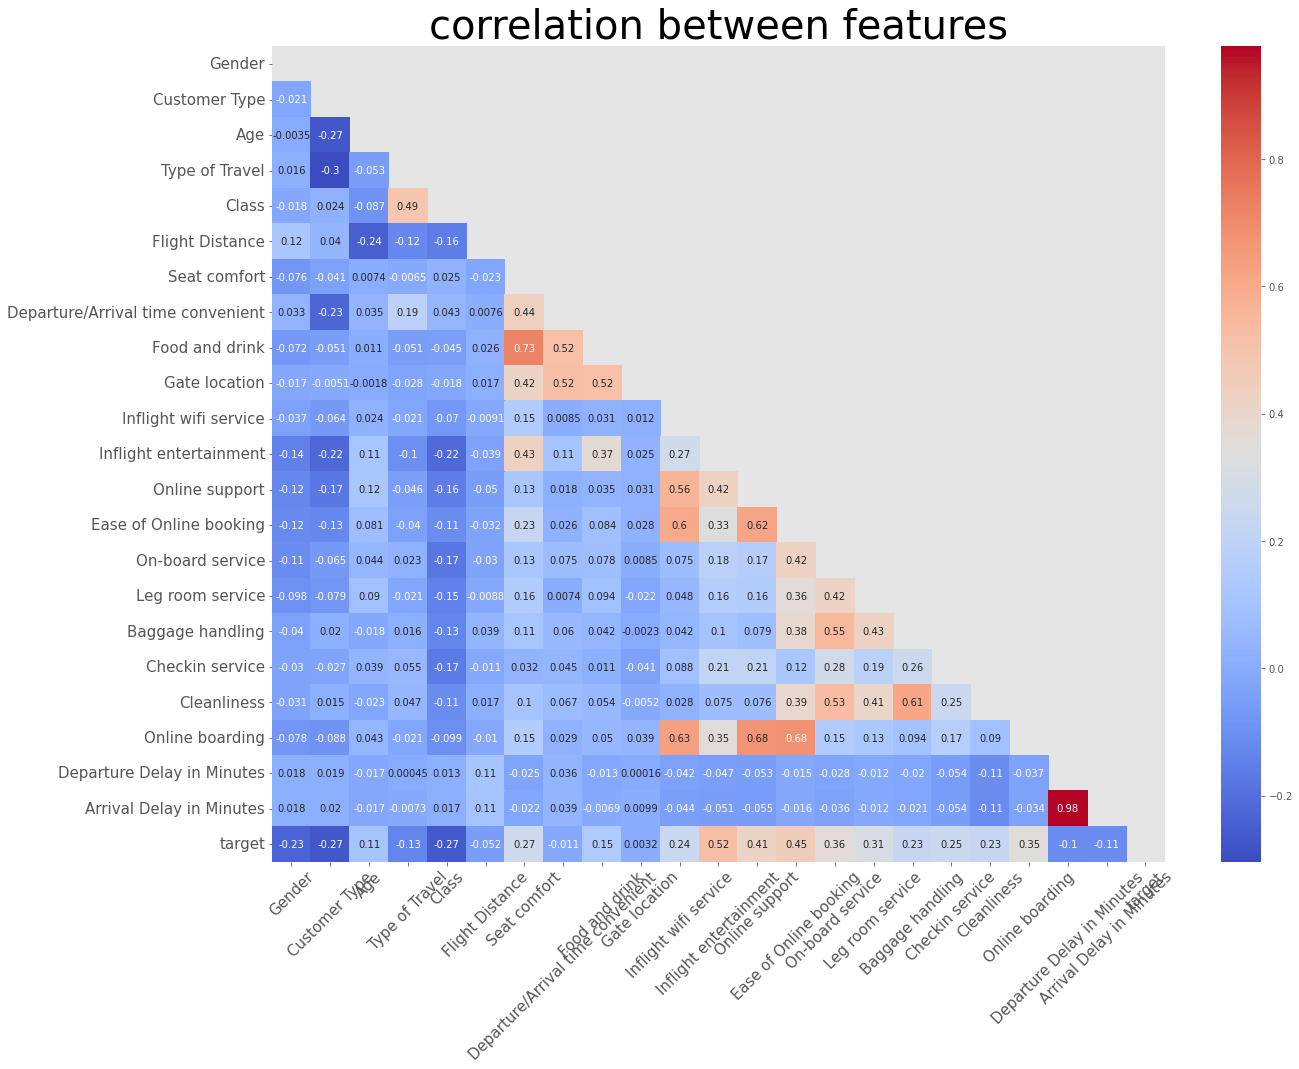

In [9]:
plt.figure(figsize=(20,15))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# 데이터 불러오기

In [16]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv("/content/train.csv")

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')

train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train set은 24 개의 feature를 가진 3000 개의 데이터 샘플로 이루어져 있습니다.


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


# 결측치 확인


In [17]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [18]:
train_x = train.drop(["id","target"],axis=1) 
train_y = train.target 

#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

# train 데이터 라벨 인코딩
label_map = make_label_map(train_x) # train 사용해 label map 생성
train_x = label_encoder(train_x, label_map) # train 라벨 인코딩

train_x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,22,1,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0
1,1,2,37,1,2,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0
2,2,2,46,1,2,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0
3,1,1,24,1,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0
4,1,2,58,1,2,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0


In [19]:
# 기초 통계량을 살펴봅니다.
train.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [20]:
# 전체의 데이터 타입을 확인합니다
train_x.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [24]:
test = pd.read_csv("/content/test.csv")
submission = pd.read_csv("/content/sample_submission.csv")
test = test.drop(["id"],axis=1) 

# 정규화

In [25]:
from sklearn.preprocessing import MinMaxScaler

num_features = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

scaler = MinMaxScaler()
train_x[num_features] = scaler.fit_transform(train_x[num_features]) 
train_x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0.205479,1,1,0.226501,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0.000000,0.000000
1,1,2,0.410959,1,2,0.403807,2,4,4,4,1,4,3,5,5,4,2,1,5,2,0.015957,0.016143
2,2,2,0.534247,1,2,0.376281,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0.000000,0.000000
3,1,1,0.232877,1,1,0.336164,3,3,3,3,3,3,3,3,2,4,5,3,4,3,0.008865,0.001794
4,1,2,0.698630,1,2,0.007760,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0.000000,0.000000


# 모델 설계

In [26]:
train_x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0.205479,1,1,0.226501,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0.000000,0.000000
1,1,2,0.410959,1,2,0.403807,2,4,4,4,1,4,3,5,5,4,2,1,5,2,0.015957,0.016143
2,2,2,0.534247,1,2,0.376281,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0.000000,0.000000
3,1,1,0.232877,1,1,0.336164,3,3,3,3,3,3,3,3,2,4,5,3,4,3,0.008865,0.001794
4,1,2,0.698630,1,2,0.007760,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2,2,0.315068,2,1,0.340410,1,5,1,1,1,4,4,1,3,5,3,4,2,4,0.187057,0.201794
2996,1,1,0.232877,1,1,0.232943,2,4,3,4,5,3,5,5,2,2,4,1,3,5,0.017730,0.011659
2997,1,1,0.205479,1,1,0.203514,2,2,2,3,4,2,4,4,3,2,3,4,3,4,0.056738,0.060090
2998,1,1,0.356164,1,2,0.308346,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0.000000,0.002691


In [29]:
import numpy as np

np.random.seed(1)

class LogisticRegression:
    
    # sigmoid 함수를 생성합니다
    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))
    
    # lossfucntion 을 생성합니다
    def loss_function(self, X, y, weights): 
        total = len(X)
        z = np.dot(X, weights)
        prediction1 = y * np.log(self.sigmoid(z))
        prediction2 = (1 - y) * np.log(1 - self.sigmoid(z))
        return -sum(prediction1 + prediction2) / total
    
    #gradient decent 방법을 이용해 학습 함수를 생성합니다
    #learning rate 와 epochs 파라미터를 지정합니다
    def fit(self, X, y, epochs=500, lr=0.01):        
        loss = []
        weights = np.random.rand(X.shape[1])
        total = len(X)
                 
        for epoch in range(epochs):        
            y_hat = self.sigmoid(np.dot(X, weights))
            weights = weights - (lr * np.dot(X.T,  y_hat - y) / total)      
            loss.append(self.loss_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss

    def predict(self, X):
        z = np.dot(X, self.weights)
        result = self.sigmoid(z)
        return result
    
    def to_bin(self,result):
        arr=[]
        for i in result:
            if i >0.5:
                arr.append(1)
            else : 
                arr.append(0)
        return arr

In [30]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

In [31]:
test = label_encoder(test, label_map) #test data 라벨 인코딩

test[num_features] = scaler.transform(test[num_features]) #test 데이터 정규화

In [32]:
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,2,0.739726,2,1,0.290630,1,1,1,1,3,5,5,5,5,5,5,3,5,3,0.045213,0.052018
1,1,1,0.273973,1,2,0.262665,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0.000000,0.000000
2,1,2,0.616438,1,2,0.229868,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0.000000,0.000000
3,2,2,0.643836,1,2,0.509810,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0.000000,0.000000
4,1,2,0.465753,1,1,0.207760,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2,0.753425,1,3,0.000293,3,1,1,1,4,3,4,3,3,3,3,3,3,1,0.000000,0.000000
1996,1,2,0.356164,1,2,0.275988,4,4,4,4,3,5,5,5,5,5,5,1,5,3,0.084220,0.088789
1997,2,2,0.301370,1,1,0.343485,3,5,4,4,3,3,3,3,1,2,3,4,2,3,0.000000,0.002691
1998,1,2,0.602740,2,2,0.051830,5,2,5,4,4,3,3,2,2,5,2,2,2,2,0.077128,0.074439


In [33]:
pred = lr.predict(test)
pred_bin = lr.to_bin(pred)

In [34]:
submission.target = pred_bin
submission.to_csv("submission.csv",index=False)

In [35]:
pred

array([0.94422784, 0.2198747 , 0.66301165, ..., 0.46924858, 0.59489957,
       0.74003661])

In [37]:
sample_submission

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1995,1996,0
1996,1997,0
1997,1998,0
1998,1999,0
